In [1]:
# Libraries applied

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
print('train:{}, test:{}'.format(train.shape, test.shape))

train:(1460, 81), test:(1459, 80)


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Working on missing values

train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [8]:
df= train.isna().sum().sum()
df

6965

In [9]:
print('Total percentage of missing values is %.2f' %(len(train) / df * 100))

Total percentage of missing values is 20.96


<AxesSubplot:>

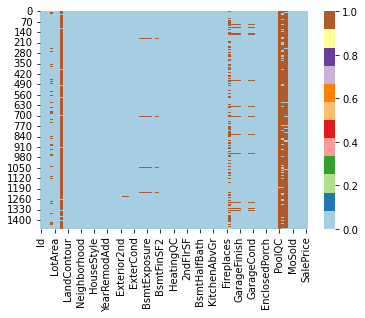

In [10]:
sns.heatmap(train.isna(),cmap='Paired')

In [11]:
# Filling missing values - None

train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [12]:
# Filling missing values - Mean

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean()) 

In [13]:
# Filling missing values - 0

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['MasVnrArea']= train['MasVnrArea'].fillna(0)

In [14]:
# Filling missing values - Most frequent values

train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].value_counts().idxmax())
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].value_counts().idxmax())
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].value_counts().idxmax())
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].value_counts().idxmax())
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].value_counts().idxmax())
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].value_counts().idxmax())
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].value_counts().idxmax())
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].value_counts().idxmax())
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].value_counts().idxmax())
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].value_counts().idxmax())
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].value_counts().idxmax())

In [15]:
# Checking again missing values (Now OK)

train.isnull().sum().sort_values(ascending=False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

<AxesSubplot:>

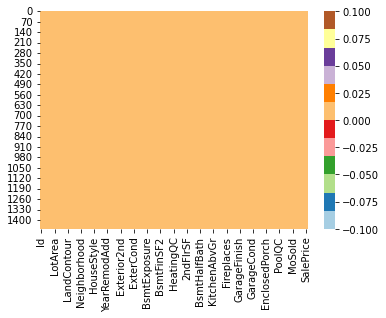

In [16]:
sns.heatmap(train.isna(),cmap='Paired')

In [17]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
# Working on correlation

corr = train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Id                 AxesSubplot(0.125,0.808774;0.0731132x0.0712264)
MSSubClass       AxesSubplot(0.212736,0.808774;0.0731132x0.0712...
LotFrontage      AxesSubplot(0.300472,0.808774;0.0731132x0.0712...
LotArea          AxesSubplot(0.388208,0.808774;0.0731132x0.0712...
OverallQual      AxesSubplot(0.475943,0.808774;0.0731132x0.0712...
OverallCond      AxesSubplot(0.563679,0.808774;0.0731132x0.0712...
YearBuilt        AxesSubplot(0.651415,0.808774;0.0731132x0.0712...
YearRemodAdd     AxesSubplot(0.739151,0.808774;0.0731132x0.0712...
MasVnrArea       AxesSubplot(0.826887,0.808774;0.0731132x0.0712...
BsmtFinSF1         AxesSubplot(0.125,0.723302;0.0731132x0.0712264)
BsmtFinSF2       AxesSubplot(0.212736,0.723302;0.0731132x0.0712...
BsmtUnfSF        AxesSubplot(0.300472,0.723302;0.0731132x0.0712...
TotalBsmtSF      AxesSubplot(0.388208,0.723302;0.0731132x0.0712...
1stFlrSF         AxesSubplot(0.475943,0.723302;0.0731132x0.0712...
2ndFlrSF         AxesSubplot(0.563679,0.723302;0.0731132x0.071

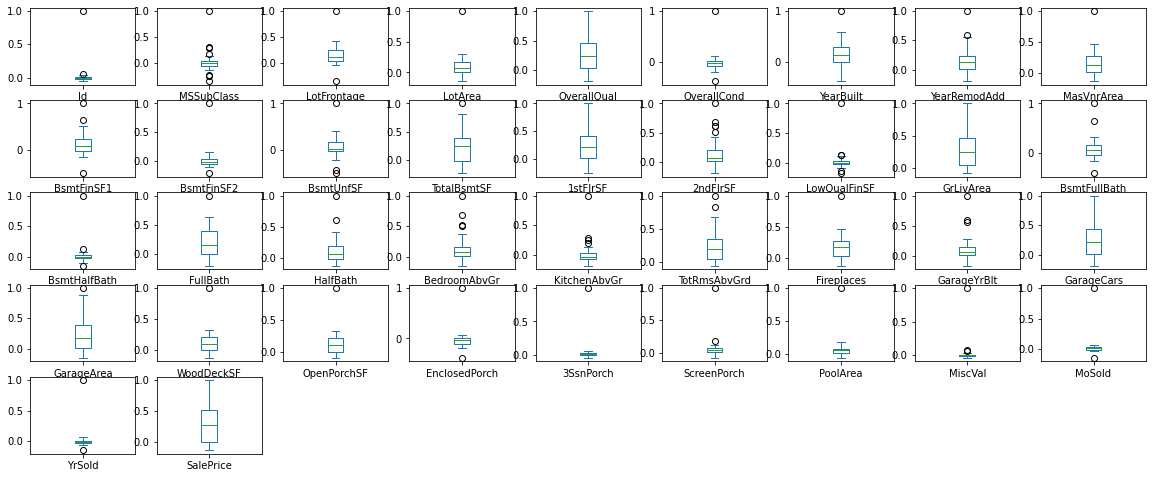

In [19]:
# Boxplot for outliers analisys (too large, for registration purpose only)

corr.plot(kind= 'box' , subplots=True, layout=(9,9),figsize=(20,15))

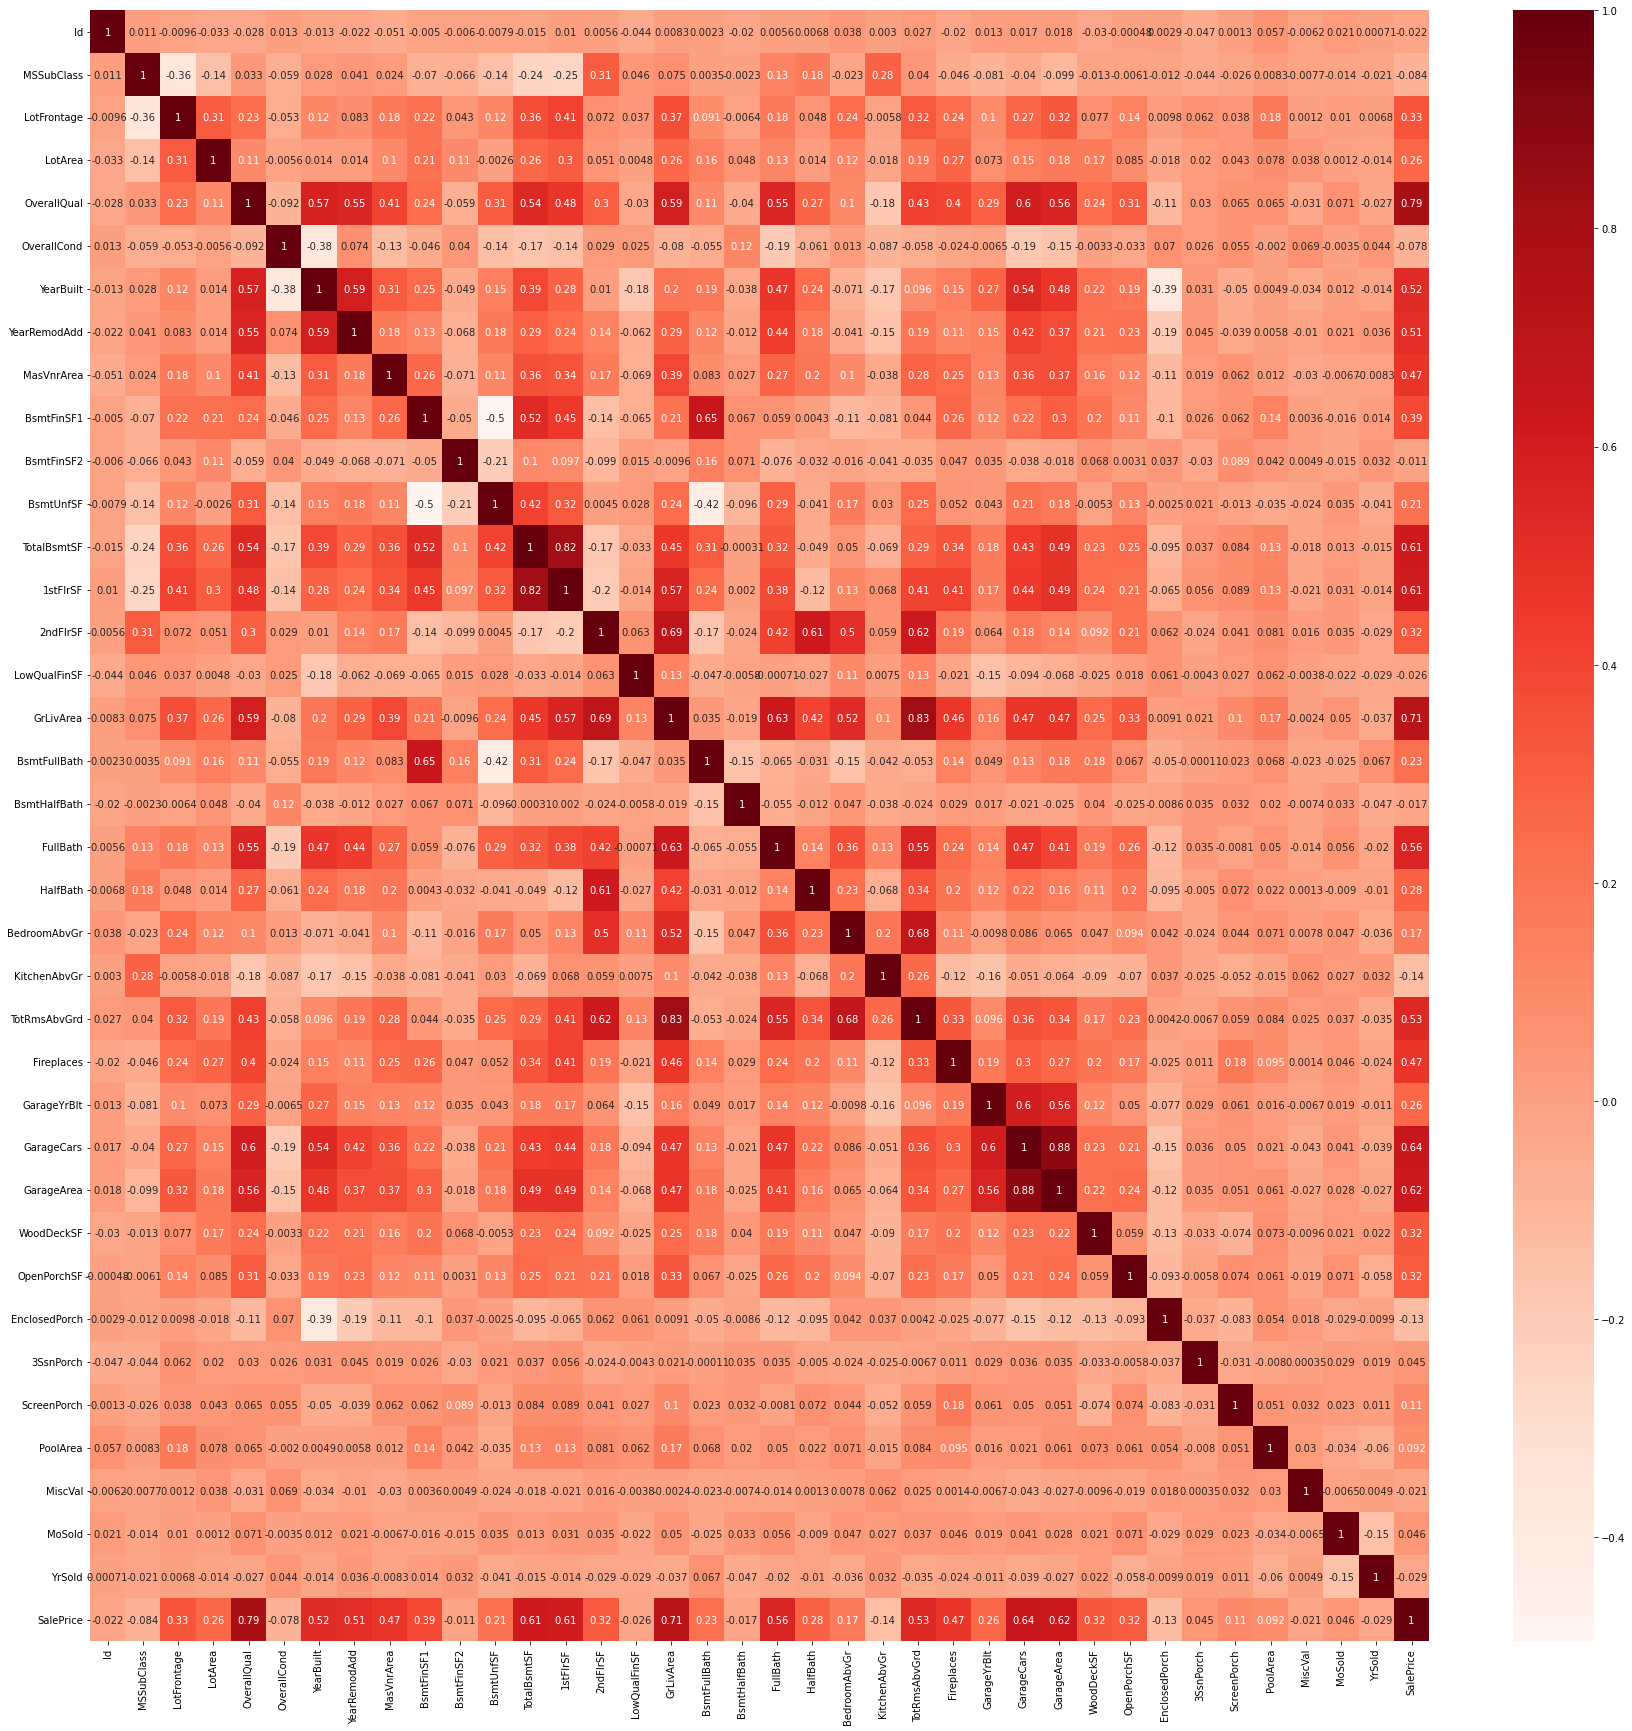

In [20]:
# Heatmap for correlation analisys (too large, for registration purpose only)
f, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(corr, annot=True, cmap='Reds', ax=ax)

In [21]:
# In my opinion, a better way to see corr with various columns
corr.sort_values(['SalePrice'], ascending=False).head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472614,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.388052,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.361945,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.370884,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.360067,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.339850,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.272999,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.279568,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


<AxesSubplot:title={'center':'1stFlrSF'}, xlabel='1stFlrSF', ylabel='SalePrice'>

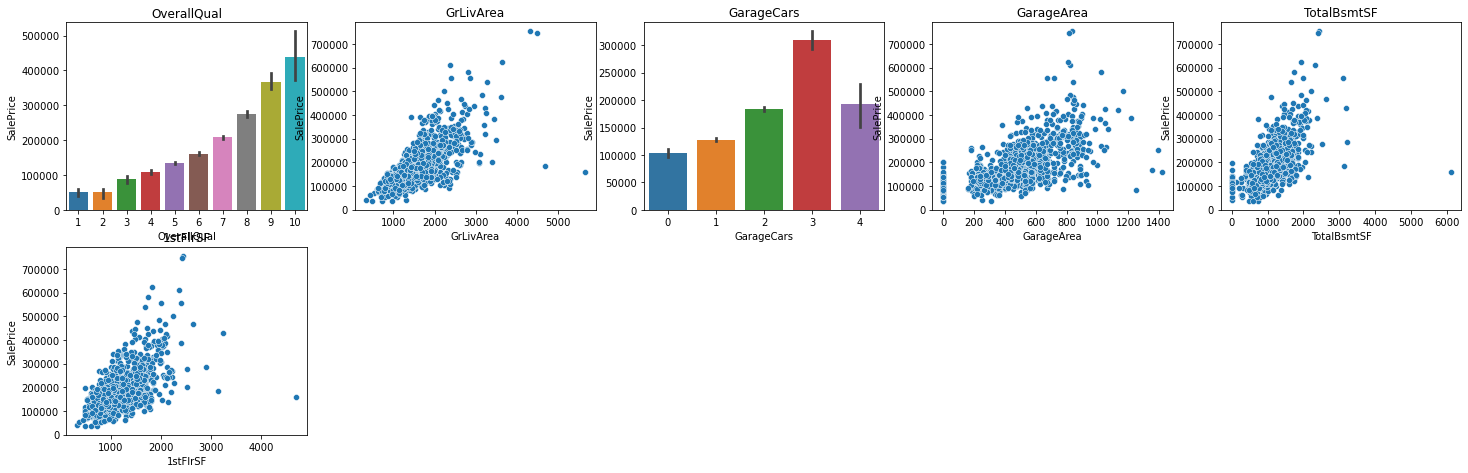

In [22]:
# Scatterplot and Bar plot on tops corr

plt.figure(figsize=(25,20))

plt.subplot(5,5,1)
plt.title('OverallQual')
sns.barplot(x='OverallQual', y='SalePrice', data=train)

plt.subplot(5,5,2)
plt.title('GrLivArea')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

plt.subplot(5,5,3)
plt.title('GarageCars')
sns.barplot(x='GarageCars', y='SalePrice', data=train)

plt.subplot(5,5,4)
plt.title('GarageArea')
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)

plt.subplot(5,5,5)
plt.title('TotalBsmtSF')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)

plt.subplot(5,5,6)
plt.title('1stFlrSF')
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)

In [23]:
#Label Encoding

label = LabelEncoder()

for i in train.columns:
    if train[i].dtypes == object:
        train[i]= label.fit_transform(train[i])

In [24]:
#Feature to use

x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [25]:
#Train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
#Model1: Decision Tree

def dtree_model(x_train, y_train):
    
    dtree = DecisionTreeRegressor(random_state=1)
    dtree.fit(x_train, y_train)
    dtree_predict = dtree.predict(x_test)
    
# Metrics of Decision Tree regressor

    MeanAbErr_tree = mean_absolute_error(y_test, dtree_predict)
    MeanSqErr_tree = metrics.mean_squared_error(y_test, dtree_predict)
    RootMeanSqErr_tree = np.sqrt(metrics.mean_squared_error(y_test, dtree_predict))
    
    print('Decision Tree: ', r2_score(y_test, dtree_predict))
    print('Mean Absolute Error: ', MeanAbErr_tree)
    print('Mean Square Error: ', MeanSqErr_tree)
    print('Root Mean Square Error: ', RootMeanSqErr_tree)

# And visualization
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test, dtree_predict, cmap='Paired')
    plt.yscale('log')
    plt.xscale('log')
    
    p1 = max(max(dtree_predict), max(y_test))
    p2 = min(min(dtree_predict), min(y_test))
    plt.plot([p1, p2], [p1, p2])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

Decision Tree:  0.7661696898489476
Mean Absolute Error:  26753.23287671233
Mean Square Error:  1631689828.3835616
Root Mean Square Error:  40394.180625228204


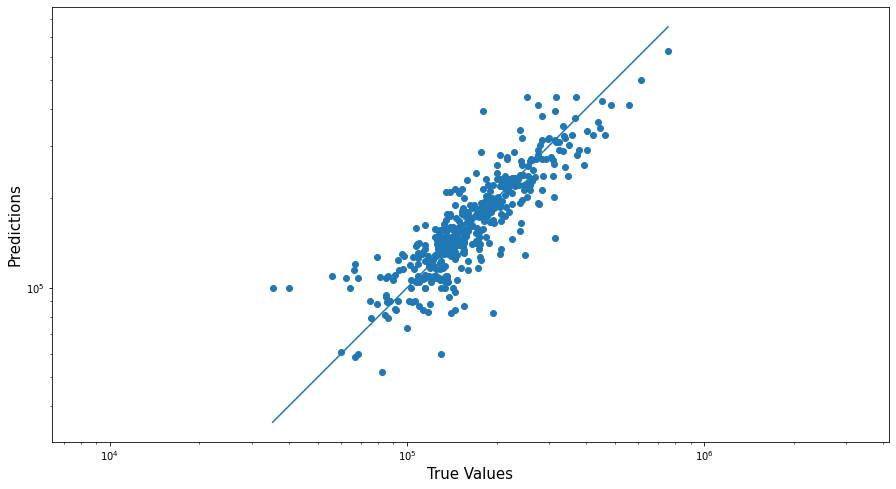

In [27]:
dtree_model(x_train, y_train)

In [28]:
#Model2: Random Forest

def rforest_model(x_train, y_train):
    
    rforest = RandomForestRegressor(n_estimators=100, random_state=0)
    rforest.fit(x_train, y_train)
    rforest_predict = rforest.predict(x_test)
    
    MeanAbErr_tree = mean_absolute_error(y_test, rforest_predict)
    MeanSqErr_tree = metrics.mean_squared_error(y_test, rforest_predict)
    RootMeanSqErr_tree = np.sqrt(metrics.mean_squared_error(y_test, rforest_predict))
    
    print('Random Forest Regressor: ', r2_score(y_test, rforest_predict))
    print('Mean Absolute Error: ', MeanAbErr_tree)
    print('Mean Square Error: ', MeanSqErr_tree)
    print('Root Mean Square Error: ', RootMeanSqErr_tree)

    plt.figure(figsize=(15,8))
    plt.scatter(y_test, rforest_predict, cmap='Paired', c='brown')
    plt.yscale('log')
    plt.xscale('log')
    
    p1 = max(max(rforest_predict), max(y_test))
    p2 = min(min(rforest_predict), min(y_test))
    plt.plot([p1, p2], [p1, p2])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

Random Forest Regressor:  0.8938945468323075
Mean Absolute Error:  17137.108196347035
Mean Square Error:  740413800.7511126
Root Mean Square Error:  27210.54576356587


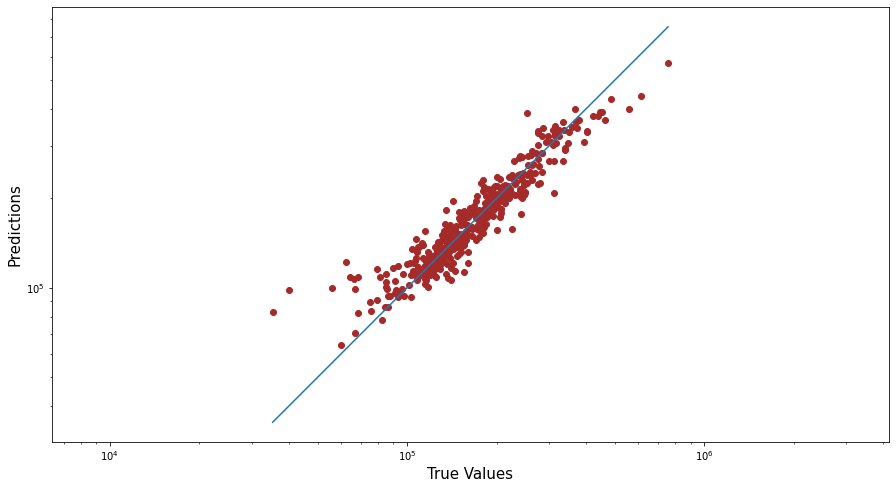

In [29]:
rforest_model(x_train, y_train)

In [30]:
#Model3: KNeighbors

def kngh_model(x_train, y_train):
    
    kngh = neighbors.KNeighborsRegressor()
    kngh.fit(x_train, y_train)
    kngh_predict = kngh.predict(x_test)
    
    MeanAbErr_tree = mean_absolute_error(y_test, kngh_predict)
    MeanSqErr_tree = metrics.mean_squared_error(y_test, kngh_predict)
    RootMeanSqErr_tree = np.sqrt(metrics.mean_squared_error(y_test, kngh_predict))
    
    print('KNeighbors Regressor: ', r2_score(y_test, kngh_predict))
    print('Mean Absolute Error: ', MeanAbErr_tree)
    print('Mean Square Error: ', MeanSqErr_tree)
    print('Root Mean Square Error: ', RootMeanSqErr_tree)

    plt.figure(figsize=(15,8))
    plt.scatter(y_test, kngh_predict, cmap='Paired', c='green')
    plt.yscale('log')
    plt.xscale('log')
    
    p1 = max(max(kngh_predict), max(y_test))
    p2 = min(min(kngh_predict), min(y_test))
    plt.plot([p1, p2], [p1, p2])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

KNeighbors Regressor:  0.6748692476534716
Mean Absolute Error:  29896.73652968037
Mean Square Error:  2268792874.4388127
Root Mean Square Error:  47631.847270904924


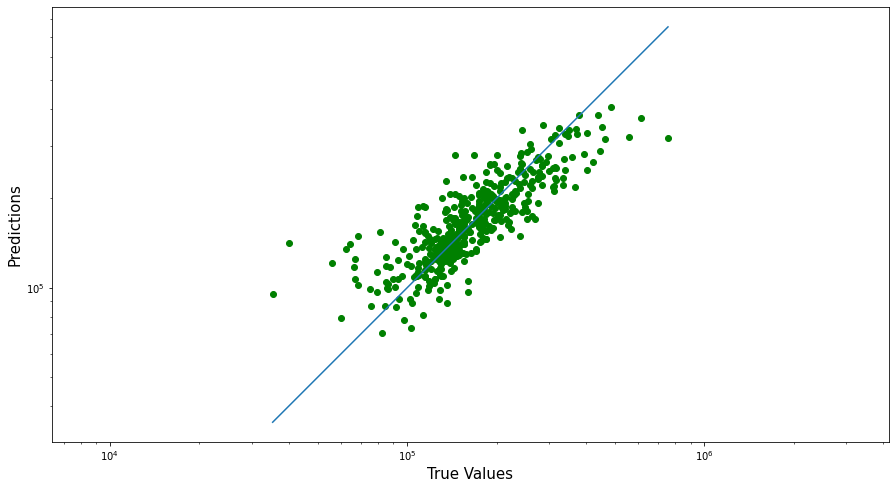

In [31]:
kngh_model(x_train, y_train)

In [32]:
#Model4: Linear Regression

def linear_reg_model(x_train, y_train):
    
    lin = LinearRegression()
    lin.fit(x_train, y_train)
    lin_predict = lin.predict(x_test)

    MeanAbErr_tree = mean_absolute_error(y_test, lin_predict)
    MeanSqErr_tree = metrics.mean_squared_error(y_test, lin_predict)
    RootMeanSqErr_tree = np.sqrt(metrics.mean_squared_error(y_test, lin_predict))
    
    print('Linear Regression: ', r2_score(y_test, lin_predict))
    print('Mean Absolute Error: ', MeanAbErr_tree)
    print('Mean Square Error: ', MeanSqErr_tree)
    print('Root Mean Square Error: ', RootMeanSqErr_tree)

    plt.figure(figsize=(15,8))
    plt.scatter(y_test, lin_predict, cmap='Paired')
    plt.yscale('log')
    plt.xscale('log')
    
    p1 = max(max(lin_predict), max(y_test))
    p2 = min(min(lin_predict), min(y_test))
    plt.plot([p1, p2], [p1, p2])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

Linear Regression:  0.8445932522822646
Mean Absolute Error:  21821.475413173062
Mean Square Error:  1084442856.656998
Root Mean Square Error:  32930.879986070795


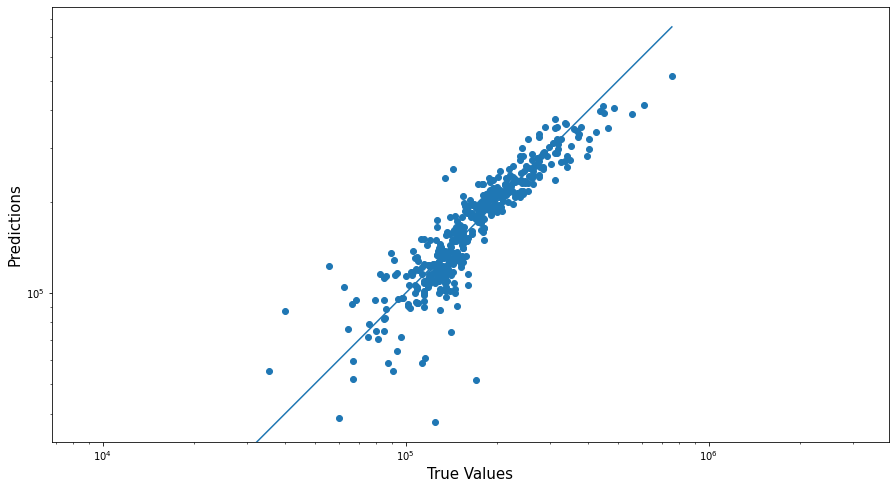

In [33]:
linear_reg_model(x_train, y_train)

In [34]:
#Model5: XGBoost

def XGBoost_model(x_train, y_train):
    
    xboost = XGBRegressor()
    xboost.fit(x_train, y_train)
    xboost_predict = xboost.predict(x_test)
    
    MeanAbErr_tree = mean_absolute_error(y_test, xboost_predict)
    MeanSqErr_tree = metrics.mean_squared_error(y_test, xboost_predict)
    RootMeanSqErr_tree = np.sqrt(metrics.mean_squared_error(y_test, xboost_predict))
    
    print('XGBoost Regressor: ', r2_score(y_test, xboost_predict))
    print('Mean Absolute Error: ', MeanAbErr_tree)
    print('Mean Square Error: ', MeanSqErr_tree)
    print('Root Mean Square Error: ', RootMeanSqErr_tree)

    plt.figure(figsize=(15,8))
    plt.scatter(y_test, xboost_predict, cmap='Paired')
    plt.yscale('log')
    plt.xscale('log')
    
    p1 = max(max(xboost_predict), max(y_test))
    p2 = min(min(xboost_predict), min(y_test))
    plt.plot([p1, p2], [p1, p2])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

XGBoost Regressor:  0.908909238086754
Mean Absolute Error:  16700.602739726026
Mean Square Error:  635639877.3860298
Root Mean Square Error:  25211.899519592527


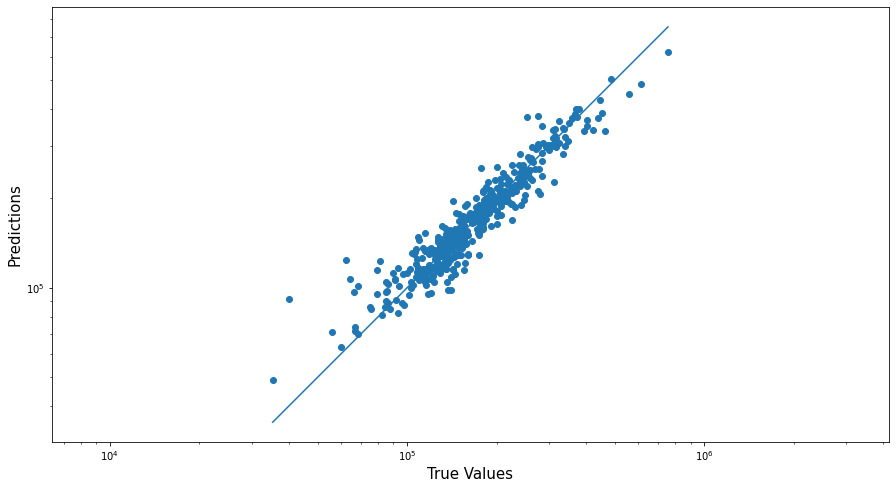

In [35]:
XGBoost_model(x_train, y_train)

In [36]:
# Now it's time to the same with Test

test.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [37]:
# Filling missing values - None

test['PoolQC'] = test['PoolQC'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [38]:
# Filling missing values - Mean

test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [39]:
# Filling missing values - 0

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['MasVnrArea']= test['MasVnrArea'].fillna(0)

In [40]:
# Filling missing values - Most frequent values (of train)

test['GarageCond'] = test['GarageCond'].fillna(train['GarageCond'].value_counts().idxmax())
test['GarageType'] = test['GarageType'].fillna(train['GarageType'].value_counts().idxmax())
test['GarageFinish'] = test['GarageFinish'].fillna(train['GarageFinish'].value_counts().idxmax())
test['GarageQual'] = test['GarageQual'].fillna(train['GarageQual'].value_counts().idxmax())
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(train['BsmtFinType2'].value_counts().idxmax())
test['BsmtExposure'] = test['BsmtExposure'].fillna(train['BsmtExposure'].value_counts().idxmax())
test['BsmtQual'] = test['BsmtQual'].fillna(train['BsmtQual'].value_counts().idxmax())
test['BsmtCond'] = test['BsmtCond'].fillna(train['BsmtCond'].value_counts().idxmax())
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(train['BsmtFinType1'].value_counts().idxmax())
test['MasVnrType'] = test['MasVnrType'].fillna(train['MasVnrType'].value_counts().idxmax())
test['Electrical'] = test['Electrical'].fillna(train['Electrical'].value_counts().idxmax())
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].value_counts().idxmax())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(train['BsmtFullBath'].value_counts().idxmax())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].value_counts().idxmax())
test['Functional'] = test['Functional'].fillna(train['Functional'].value_counts().idxmax())
test['Utilities'] = test['Utilities'].fillna(train['Utilities'].value_counts().idxmax())
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].value_counts().idxmax())
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].value_counts().idxmax())
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].value_counts().idxmax())
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].value_counts().idxmax())

In [41]:
# Filling missing values - Mean (of train)

test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())
test['GarageArea'] = test['GarageArea'].fillna(train['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())
test['GarageCars'] = test['GarageCars'].fillna(train['GarageCars'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())

In [42]:
test.isna().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageYrBlt     0
dtype: int64

In [43]:
label = LabelEncoder()
for x in test.columns:
    if test[x].dtypes == object:
        test[x]= label.fit_transform(test[x].astype(str))

In [44]:
xboost = XGBRegressor()
xboost.fit(x_train, y_train)
final_xboost = xboost.predict(test)
final_xboost.shape

(1459,)

In [45]:
final_xboost

array([128501.37, 152014.55, 196839.72, ..., 165847.95, 108159.75,
       213017.86], dtype=float32)

In [46]:
# Creating an output

predict = test['Id']
test = pd.DataFrame(test, columns=['Id'])

In [47]:
final_prediction = pd.DataFrame(final_xboost, columns=['SalePrice'])
output = pd.concat([predict, final_prediction], axis=1)
output

,Id,SalePrice
0,1461,128501.367188
1,1462,152014.546875
2,1463,196839.718750
3,1464,192793.265625
4,1465,202873.828125
...,...,...
1454,2915,72614.914062
1455,2916,80569.882812
1456,2917,165847.953125
1457,2918,108159.750000


In [48]:
output.to_csv('Submission.csv', index=False)